In [2]:
library(DescTools) #Fisher Z
library(tidyverse)
library(rstatix) #ANOVA
library(reshape)#melt
library(ggpubr) #compare means
library(ggplot2)
library(plotly)

# Import data

In [8]:
raw_loocv = read.csv('../output_data/model_comparison/LOOCV/raw_loocv.csv',row.names=1)
dimension_model_loocv = read.csv('../output_data/model_comparison/LOOCV/dimension_model_loocv.csv',row.names=1)
clustering_model_loocv = read.csv('../output_data/model_comparison/LOOCV/clustering_model_loocv_imp_revise.csv',row.names=1)
clustering_model_loocv = clustering_model_loocv[,c('exp','imp_5c','dim_umap')]
colnames(clustering_model_loocv) = c('exp','imp','dim_umap')

In [9]:
task_compare = data.frame(matrix(rep(0,9),nrow=3,ncol=3))
rownames(task_compare) = c('Free Categorization','Multi-arrangement','Dimensional survey')
colnames(task_compare) = c('raw','cluster','dimensional')

task_compare[,'raw'] = colMeans(raw_loocv)
task_compare[,'cluster'] = colMeans(dimension_model_loocv)
task_compare[,'dimensional'] = colMeans(clustering_model_loocv[1:3])

task_compare['Task'] = rownames(task_compare) 
task_compare_melt = melt(task_compare,id.vars=c('Task'))

# Plot results

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


png 
  2

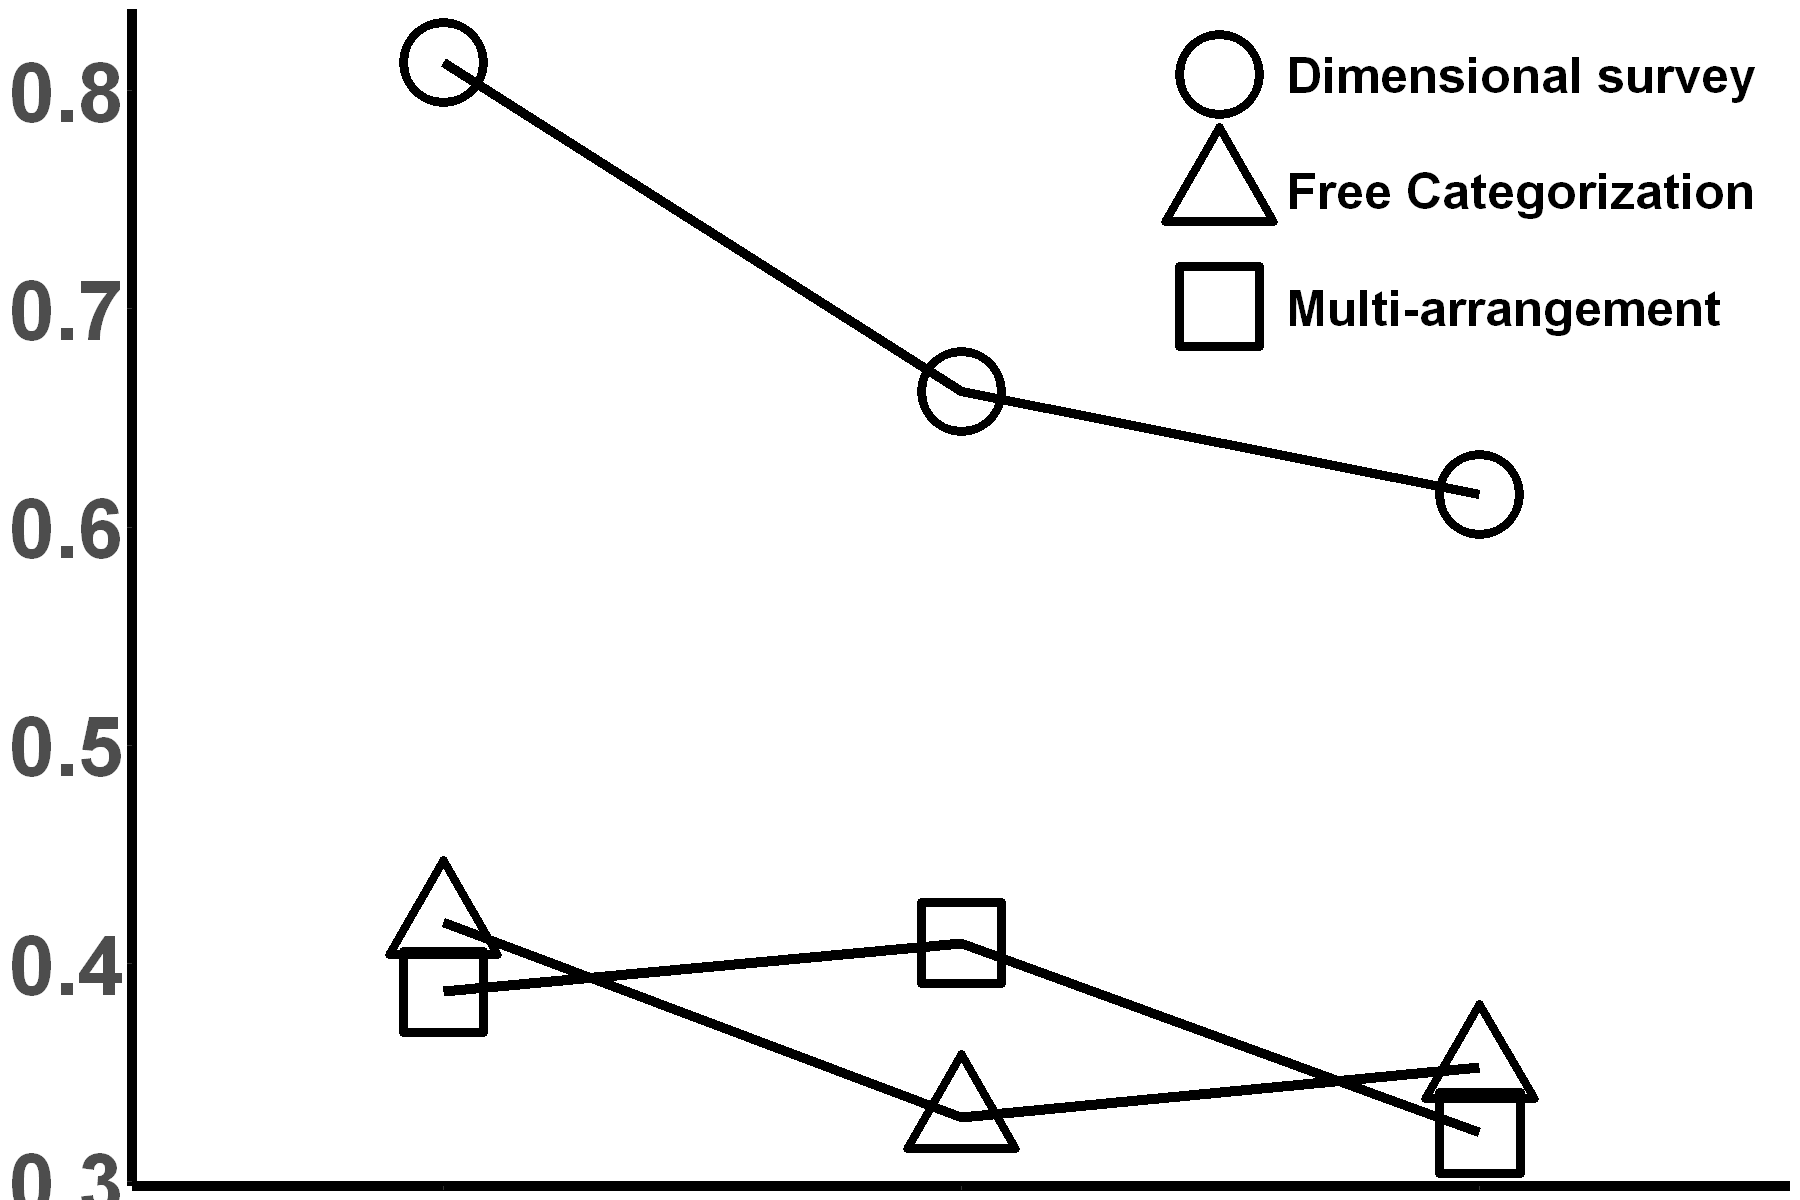

In [10]:
options(repr.plot.width = 15,repr.plot.height = 10)
ggplot(task_compare_melt,aes(x=variable,y=value))+
geom_point(aes(shape=Task),size = 20,stroke=4)+
geom_line(aes(group = Task),lwd = 3)+
scale_shape_manual(values = c('Dimensional survey'=1,'Free Categorization'=2,'Multi-arrangement'=0))+

theme_classic()+
theme(#axis.text.x=element_text(size=40,face='bold'),
      axis.text.x=element_blank(),
      axis.text.y=element_text(size=50,face='bold'),
      axis.title.x=element_blank(),
      #axis.title.y=element_text(size=50,face='bold'),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_blank(),
      legend.key.size = unit(70,'pt'),
      legend.text=element_text(face="bold",size=30),
      legend.position=c(0.8,0.85))+
guides(shape=guide_legend(ncol=1))+
ylab('LOOCV')


png("../output_graph/TaskComparison_revise.png", bg="transparent",
    family = 'sans',units='in',width=15,height=10,res=300)
ggplot(task_compare_melt,aes(x=variable,y=value))+
geom_point(aes(shape=Task),size = 20,stroke=4)+
geom_line(aes(group = Task),lwd = 3)+
scale_shape_manual(values = c('Dimensional survey'=1,'Free Categorization'=2,'Multi-arrangement'=0))+

theme_classic()+
theme(#axis.text.x=element_text(size=40,face='bold'),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.title.x=element_blank(),
      #axis.title.y=element_text(size=50,face='bold'),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_blank(),
      legend.key.size = unit(60,'pt'),
      legend.text=element_text(face="bold",size=30),
      legend.position='none')+
guides(shape=guide_legend(ncol=1))+
ylab('LOOCV')
dev.off()

# ANOVA

In [11]:
dimension_model_loocv = read.csv('../output_data/model_comparison/LOOCV/dimension_model_loocv.csv',row.names=1)
colnames(dimension_model_loocv) = c('dimension_exp','dimension_imp','dimension_dim')

clustering_loocv = read.csv('../output_data/model_comparison/LOOCV/clustering_model_loocv_imp_revise.csv',row.names=1)
clustering_model_loocv = clustering_loocv[,c('exp','imp_5c','dim_umap')]
colnames(clustering_model_loocv) = c('exp','imp','dim_umap')
colnames(clustering_model_loocv) = c('clustering_exp','clustering_imp','clustering_dim_umap')

In [12]:
task_compare_anova = cbind(dimension_model_loocv,clustering_model_loocv)
task_compare_anova = FisherZ(task_compare_anova) # Z-score
task_compare_anova$'sub' = rownames(task_compare_anova)
task_compare_anova_melt = melt(task_compare_anova, id.vars='sub')
task_compare_anova_melt = task_compare_anova_melt %>% 
                           mutate('task'=case_when(variable=='dimension_exp'~'exp',
                                                   variable=='dimension_imp'~'imp',
                                                   variable=='dimension_dim'~'dim',
                                                   variable=='clustering_exp'~'exp',
                                                   variable=='clustering_imp'~'imp',
                                                   variable=='clustering_dim_umap'~'dim'))
task_compare_anova_melt = task_compare_anova_melt %>% 
                          mutate('model'=case_when(variable=='dimension_exp'~'dimension',
                                                   variable=='dimension_imp'~'dimension',
                                                   variable=='dimension_dim'~'dimension',
                                                   variable=='clustering_exp'~'clustering',
                                                   variable=='clustering_imp'~'clustering',
                                                   variable=='clustering_dim_umap'~'clustering'))

In [13]:
task_compare_anova_melt = task_compare_anova_melt %>% 
                          convert_as_factor(sub, task, model)
head(task_compare_anova_melt)

,sub,variable,value,task,model
,<fct>,<fct>,<dbl>,<fct>,<fct>
1,sub-301,dimension_exp,0.5222274,exp,dimension
2,sub-693,dimension_exp,0.3333119,exp,dimension
3,sub-700,dimension_exp,0.6212318,exp,dimension
4,sub-701,dimension_exp,0.1997045,exp,dimension
5,sub-706,dimension_exp,0.3408452,exp,dimension
6,sub-716,dimension_exp,0.1623412,exp,dimension


In [14]:
res.aov = anova_test(
    data = task_compare_anova_melt,dv = value, wid = sub,
    within = c(task,model))
get_anova_table(res.aov)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,task,2,26,123.566,5.27e-14,*,0.745
2,model,1,13,6.448,2.50e-02,*,0.063
3,task:model,2,26,3.969,3.10e-02,*,0.062


In [15]:
# Post hoc
pwc <- task_compare_anova_melt %>%
  group_by(model) %>%
  pairwise_t_test(value ~ task, p.adjust.method = "bonferroni",paired=FALSE)
pwc

,model,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,clustering,value,dim,exp,14,14,1.16e-13,****,3.49e-13,****
2,clustering,value,dim,imp,14,14,7.37e-15,****,2.21e-14,****
3,clustering,value,exp,imp,14,14,2.98e-01,ns,8.95e-01,ns
4,dimension,value,dim,exp,14,14,4.29e-11,****,1.29e-10,****
5,dimension,value,dim,imp,14,14,1.35e-08,****,4.04e-08,****
6,dimension,value,exp,imp,14,14,6.78e-02,ns,2.03e-01,ns


In [16]:
# Post hoc
pwc <- task_compare_anova_melt %>%
  group_by(task) %>%
  pairwise_t_test(value ~ model, p.adjust.method = "bonferroni",paired=FALSE)
pwc

,task,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,dim,value,clustering,dimension,14,14,0.0284,*,0.0284,*
2,exp,value,clustering,dimension,14,14,0.6350,ns,0.6350,ns
3,imp,value,clustering,dimension,14,14,0.0305,*,0.0305,*
